# Step potentials
Calculating the solutions to 1-D scattering problems using matrices

In [1]:
from sympy import *

In [2]:
init_printing()

First let's look at a single step located at _x_=0.

In [3]:
V1, V2 = symbols("V1 V2", real=True) # potentials
k1, k2 = symbols("k1 k2") # wavevectors
En = symbols("En", real=True) # energy (E = the number "e")
A1, B1, A2, B2 = symbols("A1 B1 A2 B2") # amplitudes
x = symbols("x", real=True)

Defining our wavefunctions in each region:

In [4]:
psi1 = lambda x: A1*exp(I*k1*x) + B1*exp(-I*k1*x)

In [5]:
psi1(x)

In [6]:
psi2 = lambda x: A2*exp(I*k2*x) + B2*exp(-I*k2*x)

In [7]:
psi2(x)

The boundary conditions for continuity and continuity of the derivative are

In [8]:
eq1 = Eq(psi1(0),psi2(0))
eq1

In [9]:
eq2 = Eq(diff(psi1(x),x),diff(psi2(x),x)).subs(x,0)
eq2

So, if we have an incoming wave from the left, we set $A_1 = 1$ and $B_2 = 0$, then solve...

In [10]:
eq1.subs({A1:1, B2:0})

In [11]:
eq2.subs({A1:1, B2:0})

Solve this directly:

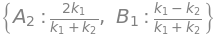

In [12]:
solve([eq1.subs({A1:1, B2:0}), eq2.subs({A1:1, B2:0})],[A2,B1])

Next, recast this in matrix form to allow us to generalize to multiple steps...

The general idea is that we can express things in the form
$$
\begin{pmatrix} \cdot & \cdot \\ \cdot & \cdot \end{pmatrix}
\begin{pmatrix} A_j \\ B_j \end{pmatrix}
$$
for each side of each boundary.  Setting these expressions equal and then doing some matrix manipulations leads to the "transfer matrix" (also called "T matrix" or "M matrix":
$$
\begin{pmatrix} A_2 \\ B_2 \end{pmatrix} = 
\begin{pmatrix} T_{AA} & T_{AB} \\ T_{BA} & T_{BB} \end{pmatrix}
\begin{pmatrix} A_1 \\ B_1 \end{pmatrix}
$$

The transfer matrices are useful because we can use then to concatenate multiple scattering steps.

Looking up at the boundary condition equations above, we have in matrix form:
$$
\begin{pmatrix} 1 & 1 \\ ik_1 & -ik_1 \end{pmatrix}
\begin{pmatrix}A_1 \\ B_1 \end{pmatrix} =
\begin{pmatrix} 1 & 1 \\ ik_2 & -ik_2 \end{pmatrix}
\begin{pmatrix}A_2 \\ B_2 \end{pmatrix}
$$

Let me call those matrices $H_j$...

In [13]:
H1 = Matrix([[1,1],[I*k1,-I*k1]])
H2 = Matrix([[1,1],[I*k2,-I*k2]])
H1, H2

⎛⎡ 1      1  ⎤  ⎡ 1      1  ⎤⎞
⎜⎢           ⎥, ⎢           ⎥⎟
⎝⎣ⅈ⋅k₁  -ⅈ⋅k₁⎦  ⎣ⅈ⋅k₂  -ⅈ⋅k₂⎦⎠

Multiplying both sides by the inverse of the matrix on the right gives us the transfer matrix $T_{12}$

In [20]:
T12 = H2.inv()*H1
T12

⎡  k₁    1      k₁    1⎤
⎢ ──── + ─   - ──── + ─⎥
⎢ 2⋅k₂   2     2⋅k₂   2⎥
⎢                      ⎥
⎢   k₁    1    k₁    1 ⎥
⎢- ──── + ─   ──── + ─ ⎥
⎣  2⋅k₂   2   2⋅k₂   2 ⎦

In [ ]:
T12

In [22]:
from IPython.display import display_markdown

In [39]:
display_markdown(f"""
So, now the equation becomes
$${latex(T1)}"""+
r"""
\begin{pmatrix}A_1 \\ B_1 \end{pmatrix} = \begin{pmatrix} A_2 \\ B_2 \end{pmatrix} $$
""", raw=True)


So, now the equation becomes
$$\left[\begin{matrix}\frac{1}{2} + \frac{k_{2}}{2 k_{1}} & \frac{1}{2} - \frac{k_{2}}{2 k_{1}}\\\frac{1}{2} - \frac{k_{2}}{2 k_{1}} & \frac{1}{2} + \frac{k_{2}}{2 k_{1}}\end{matrix}\right]
\begin{pmatrix}A_1 \\ B_1 \end{pmatrix} = \begin{pmatrix} A_2 \\ B_2 \end{pmatrix} $$


Multiplying this out and pulling everything to one side we have

In [41]:
T12*Matrix([[A1],[B1]]) - Matrix([[A2],[B2]])

⎡   ⎛ k₁    1⎞           ⎛   k₁    1⎞⎤
⎢A₁⋅⎜──── + ─⎟ - A₂ + B₁⋅⎜- ──── + ─⎟⎥
⎢   ⎝2⋅k₂   2⎠           ⎝  2⋅k₂   2⎠⎥
⎢                                    ⎥
⎢   ⎛   k₁    1⎞      ⎛ k₁    1⎞     ⎥
⎢A₁⋅⎜- ──── + ─⎟ + B₁⋅⎜──── + ─⎟ - B₂⎥
⎣   ⎝  2⋅k₂   2⎠      ⎝2⋅k₂   2⎠     ⎦

A couple of variations exist that have other uses.  In particular, let's define the scattering matrix (or "S matrix") that relates all of the _incoming_ waves to the _outgoing_ waves.  Essentially we shuffle the A's and B's:
$$
S \begin{pmatrix} A_1 \\ B_2 \end{pmatrix} = \begin{pmatrix} A_2 \\ B_1 \end{pmatrix}.
$$

Let's also define a propagation matrix _G_ that depends on the local value of the wavevector and a distance:
$$
G = \begin{pmatrix} e^{ikd} & 0 \\ 0 & e^{-ikd} \end{pmatrix}
$$